In [1]:
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

In [2]:
df = pd.read_csv('nvda.csv')

In [3]:
df.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.tail(5)

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [5]:
df = pd.read_csv("nvda.csv", index_col="Date", parse_dates=True)
if not is_datetime(df.index):
    df.index = pd.to_datetime(df.index)

var_col = "Temp"  
df_subset = df[[var_col]]
df_time = df_subset["1981-01-01":"1990-12-31"].copy()
df_time

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


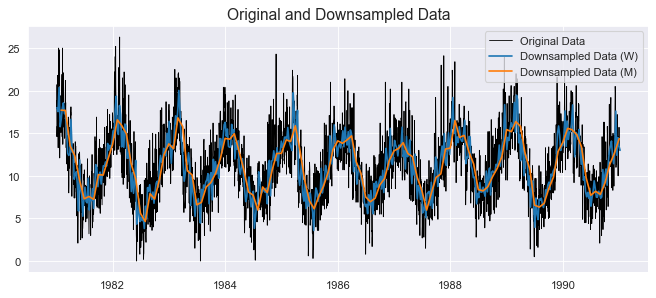

In [6]:
downsample_one = "W"  
downsample_two = "M" 
df_downsample_one = df_time.resample(downsample_one).mean().copy()
df_downsample_two = df_time.resample(downsample_two).mean().copy()
plt.plot(
    df_time.index,
    df_time[var_col],
    label="Original Data",
    color="black",
    linewidth=0.75,
)

plt.plot(
    df_downsample_one.index,
    df_downsample_one[var_col],
    label=f"Downsampled Data ({downsample_one})",
)

plt.plot(
    df_downsample_two.index,
    df_downsample_two[var_col],
    label=f"Downsampled Data ({downsample_two})",
)
plt.legend()
plt.title("Original and Downsampled Data", fontsize=14)
plt.show()

In [7]:
upsample = "H"  
df_time_subset = df_time["1981-01-01":"1990-12-31"]
df_upsample = df_time_subset.resample(upsample).asfreq()
df_upsample.head()

,Temp
Date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,NaN
1981-01-01 02:00:00,NaN
1981-01-01 03:00:00,NaN
1981-01-01 04:00:00,NaN


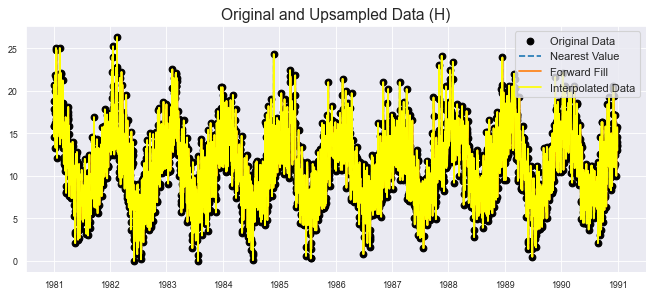

In [8]:
df_upsample = df_time_subset.resample(upsample).asfreq()
df_upsample["nearest_value"] = df_time_subset.resample(upsample).interpolate(method="nearest")
df_upsample["forward_fill"] = df_time_subset.resample(upsample).ffill()
df_upsample["interpolate"] = df_time_subset.resample(upsample).interpolate()
plt.scatter(df_time_subset.index, df_time_subset[var_col], label="Original Data", color="black")
plt.plot(df_upsample.index, df_upsample["nearest_value"], label="Nearest Value", linestyle="dashed")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label="Forward Fill")
plt.plot(df_upsample.index, df_upsample["interpolate"], label="Interpolated Data", color = 'yellow')
plt.legend()
plt.title(f"Original and Upsampled Data ({upsample})", fontsize=14)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

# Mine

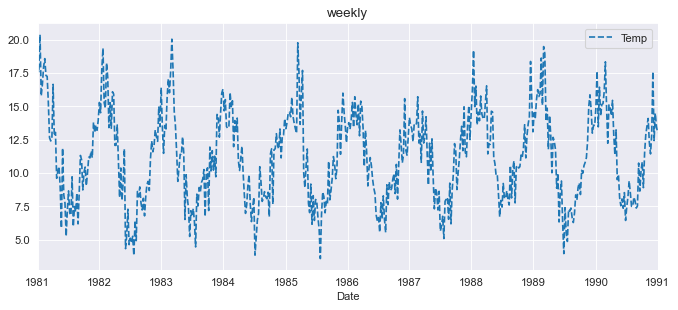

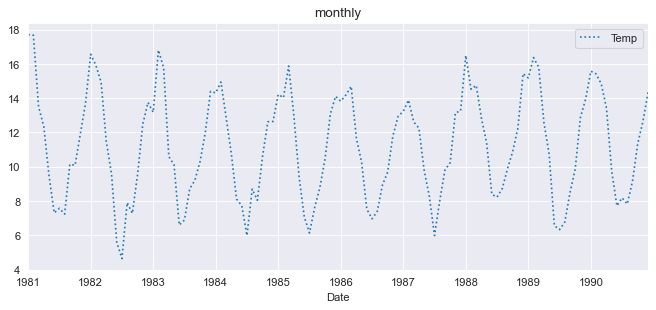

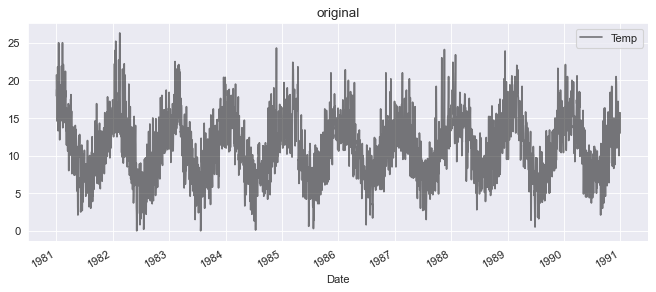

In [10]:
df_weekly = df_time.resample("W").mean()
df_monthly = df_time.resample("M").mean()

df_weekly.plot(label="Weekly", linestyle="--", title='weekly')
df_monthly.plot(label="Monthly", linestyle=":", title = 'monthly')
df_time.plot(label="Original", alpha=0.5, color="black", title = 'original')

plt.legend()
plt.show()


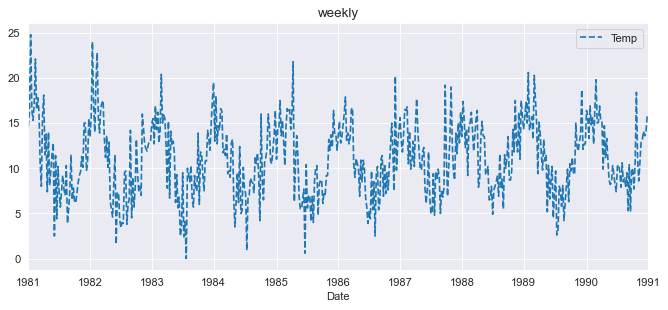

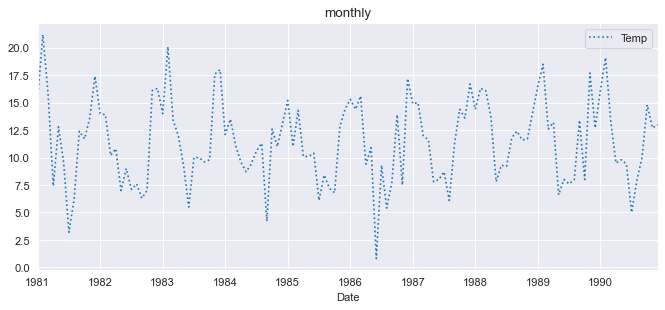

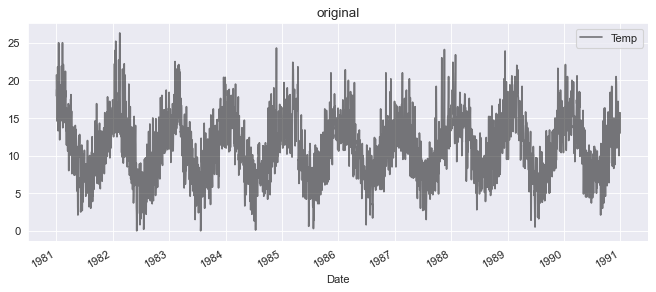

In [12]:
df_weekly = df_time.resample("W").interpolate()
df_monthly = df_time.resample("M").interpolate()

df_weekly.plot(label="Weekly", linestyle="--", title = 'weekly')
df_monthly.plot(label="Monthly", linestyle=":", title = 'monthly')
df_time.plot(label="Original", alpha=0.5, color="black", title = 'original')

plt.legend()
plt.show()
